In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,4.5)
plt.rcParams['figure.dpi'] = 150
sns.set_style('white')

In [25]:
# dados municipais extras
muni = pd.read_csv('https://github.com/wcota/covid19br/blob/master/cities_info.csv?raw=true')

In [26]:
# votos em cada municipio no primeiro e segundo turno
d1t = pd.read_csv('https://github.com/wcota/br_eleicoes_2022_1T/blob/main/municipios/municipios.csv?raw=true')
d2t = pd.read_csv('https://github.com/wcota/br_eleicoes_2022_2T/blob/main/municipios/municipios.csv?raw=true')

In [27]:
# unindo os dados e mostrando alguns exemplos de diferenças para Lula e Bolsonaro
df = pd.merge(d1t,d2t,on=['id_ibge','nc'], suffixes=['_1t','_2t'], how='outer').fillna(0).convert_dtypes()[['id_ibge','nc','votos_1t','votos_2t','prop_1t','prop_2t']]
df[df['nc'].isin(['LULA','JAIR BOLSONARO'])].sample(10)

,id_ibge,nc,votos_1t,votos_2t,prop_1t,prop_2t
19074,3119955,JAIR BOLSONARO,1897,2398,47.271368,57.88
53163,3512001,JAIR BOLSONARO,4967,5794,46.752636,53.55
4148,2923803,JAIR BOLSONARO,2864,3279,16.39288,18.45
44671,4304804,JAIR BOLSONARO,12563,14478,65.157409,74.59
32946,2201804,JAIR BOLSONARO,807,942,18.142986,22.17
18843,3151305,LULA,4158,4356,57.407152,57.65
59654,3539103,JAIR BOLSONARO,3898,4613,37.881438,45.53
4895,2929057,LULA,6077,6217,63.085228,64.38
20328,3153004,JAIR BOLSONARO,1267,1423,56.587762,62.52
5721,2933174,JAIR BOLSONARO,1554,1629,22.35328,23.63


In [28]:
# função para juntar dados por município e gerar as diferenças
def transform_df(df):
    _df = df.groupby(['id_ibge'])[['votos_1t', 'votos_2t']].sum().reset_index()
    _df['prop_1t'] = 100.0
    _df['prop_2t'] = 100.0
    _df['nc'] = 'TOTAL'
    _df = pd.concat([df, _df])
    #_df = df.groupby(['id_ibge'])[['votos_1t','votos_2t']].sum()
    _df['diferenca_votos'] = _df['votos_2t'] - _df['votos_1t']
    _df['modulo_diferenca_votos'] = abs(_df['diferenca_votos'])
    _df['porcentagem_diferenca_votos'] = _df['diferenca_votos']/_df['votos_1t'] * 100
    _df['modulo_porcentagem_diferenca_votos'] = abs(_df['porcentagem_diferenca_votos'])
    _df = pd.merge(_df, muni[['ibge','city']], left_on='id_ibge',right_on='ibge').rename(columns={'city' : 'municipio','nc' : 'candidato'})[['id_ibge','municipio','candidato','votos_1t','votos_2t','prop_1t','prop_2t','diferenca_votos','modulo_diferenca_votos','porcentagem_diferenca_votos','modulo_porcentagem_diferenca_votos']]
    _df = _df.sort_values(by=['id_ibge','candidato']).reset_index(drop=True)
    return _df
diferencas = transform_df(df)
diferencas.to_csv('diferencas_entre_turnos.csv', index=False)

## Distribuição de diferenças de votos totais por município de um turno para o outro

In [29]:
_df = diferencas[diferencas['candidato'] == "TOTAL"]

### 10 cidades com mais votos proporcionais no segundo turno

In [30]:
_df.sort_values(by='porcentagem_diferenca_votos', ascending=False).head(20)[['id_ibge','municipio','diferenca_votos','porcentagem_diferenca_votos','votos_1t','votos_2t']] #,'prop_1t','prop_2t']]

,id_ibge,municipio,diferenca_votos,porcentagem_diferenca_votos,votos_1t,votos_2t
56470,4305157,Cerro Grande/RS,208,10.211095,2037,2245
31558,3134103,Itueta/MG,295,8.16722,3612,3907
31114,3130655,Indaiabira/MG,322,8.141593,3955,4277
35002,3157658,Santa Helena de Minas/MG,275,7.744297,3551,3826
35386,3160504,Santo Antônio do Rio Abaixo/MG,109,7.681466,1419,1528
32266,3138674,Luisburgo/MG,322,7.64301,4213,4535
28786,3114303,Carmo do Paranaíba/MG,1205,7.616941,15820,17025
28486,3112000,Candeias/MG,640,7.54717,8480,9120
63058,5106174,Nova Nazaré/MT,127,7.392317,1718,1845
34978,3157500,Santa Efigênia de Minas/MG,173,7.193347,2405,2578


### 10 cidades com menos votos proporcionais no segundo turno

In [31]:
_df.sort_values(by='porcentagem_diferenca_votos', ascending=True).head(20)[['id_ibge','municipio','diferenca_votos','porcentagem_diferenca_votos','votos_1t','votos_2t']] #,'prop_1t','prop_2t']]

,id_ibge,municipio,diferenca_votos,porcentagem_diferenca_votos,votos_1t,votos_2t
790,1200393,Porto Walter/AC,-1544,-28.057423,5503,3959
3622,1600253,Itaubal/AP,-1460,-24.859527,5873,4413
3598,1600212,Cutias/AP,-992,-24.289912,4084,3092
3694,1600550,Pracuúba/AP,-701,-23.066798,3039,2338
766,1200351,Marechal Thaumaturgo/AC,-1607,-19.940439,8059,6452
1798,1400605,São Luiz/RR,-962,-19.57672,4914,3952
3718,1600709,Tartarugalzinho/AP,-1477,-18.469426,7997,6520
3610,1600238,Ferreira Gomes/AP,-908,-18.444038,4923,4015
3562,1600105,Amapá/AP,-900,-16.828721,5348,4448
1018,1300631,Beruri/AM,-1726,-16.814418,10265,8539


### Distribuição das diferenças % de mais votos, e menos votos

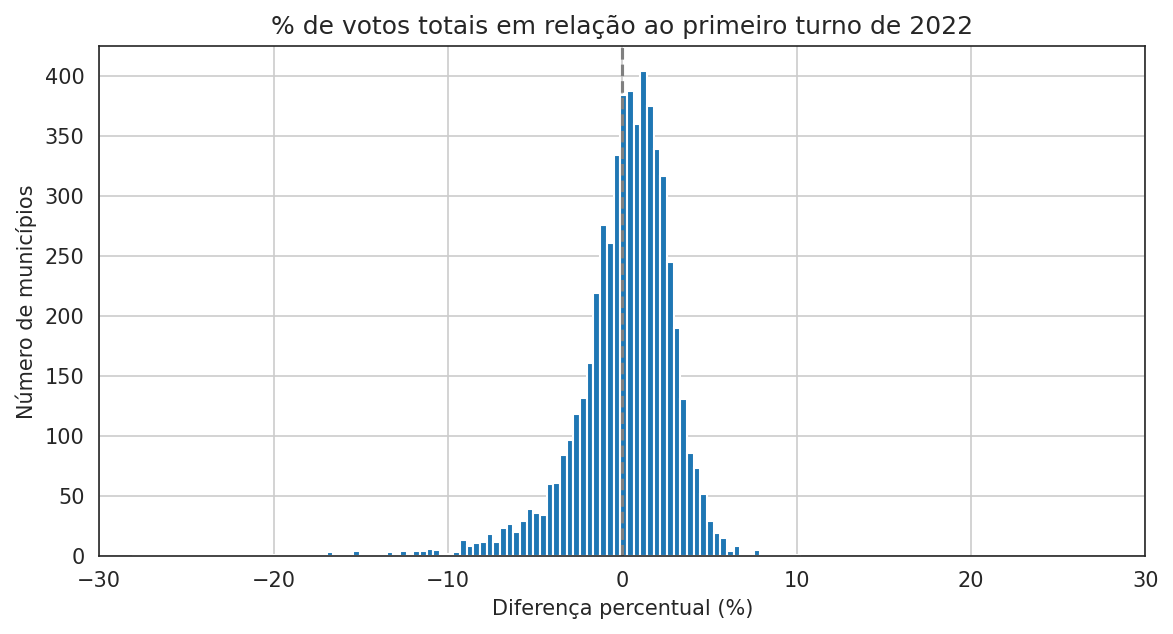

In [32]:
_df['porcentagem_diferenca_votos'].hist(bins=100)
plt.gca().set_xlim(-30,30)
plt.gca().axvline(0, linestyle='--',color='gray')
plt.gca().set_title('% de votos totais em relação ao primeiro turno de 2022')
plt.gca().set_ylabel('Número de municípios')
plt.gca().set_xlabel('Diferença percentual (%)')
_copy_total = _df['porcentagem_diferenca_votos'].copy()

## Variação nos votos de Bolsonaro

In [33]:
_df = diferencas[diferencas['candidato'] == "JAIR BOLSONARO"]

### 10 cidades com mais votos proporcionais no segundo turno para o Bolsonaro

In [34]:
_df.sort_values(by='porcentagem_diferenca_votos', ascending=False).head(20)[['id_ibge','municipio','candidato','diferenca_votos','porcentagem_diferenca_votos','votos_1t','votos_2t','prop_1t','prop_2t']]

,id_ibge,municipio,candidato,diferenca_votos,porcentagem_diferenca_votos,votos_1t,votos_2t,prop_1t,prop_2t
22743,2905503,Caldeirão Grande/BA,JAIR BOLSONARO,751,64.5189,1164,1915,15.466383,24.77
17175,2514552,São José de Princesa/PB,JAIR BOLSONARO,142,62.008734,229,371,9.290061,15.36
14295,2410702,Riacho da Cruz/RN,JAIR BOLSONARO,201,55.524862,362,563,15.898112,25.27
9495,2206050,Massapê do Piauí/PI,JAIR BOLSONARO,127,44.097222,288,415,6.338028,9.18
9591,2206654,Morro Cabeça no Tempo/PI,JAIR BOLSONARO,162,41.326531,392,554,14.233842,20.63
56463,4305157,Cerro Grande/RS,JAIR BOLSONARO,276,40.469208,682,958,33.480609,42.67
10407,2210375,São Luis do Piauí/PI,JAIR BOLSONARO,108,40.449438,267,375,11.720808,17.0
12003,2308203,Meruoca/CE,JAIR BOLSONARO,554,38.286109,1447,2001,14.44977,20.08
8283,2201556,Bela Vista do Piauí/PI,JAIR BOLSONARO,121,37.694704,321,442,11.000685,15.62
8787,2203008,Cristalândia do Piauí/PI,JAIR BOLSONARO,208,37.61302,553,761,13.070196,17.76


### 10 cidades com menos votos proporcionais no segundo turno para o Bolsonaro

In [35]:
_df.sort_values(by='porcentagem_diferenca_votos', ascending=True).head(20)[['id_ibge','municipio','candidato','diferenca_votos','porcentagem_diferenca_votos','votos_1t','votos_2t','prop_1t','prop_2t']]

,id_ibge,municipio,candidato,diferenca_votos,porcentagem_diferenca_votos,votos_1t,votos_2t,prop_1t,prop_2t
3591,1600212,Cutias/AP,JAIR BOLSONARO,-227,-15.389831,1475,1248,36.116552,40.36
4563,1712405,Lizarda/TO,JAIR BOLSONARO,-82,-14.748201,556,474,24.656319,24.75
3615,1600253,Itaubal/AP,JAIR BOLSONARO,-326,-13.737885,2373,2047,40.405244,46.39
3687,1600550,Pracuúba/AP,JAIR BOLSONARO,-162,-13.160032,1231,1069,40.506746,45.72
783,1200393,Porto Walter/AC,JAIR BOLSONARO,-277,-12.925805,2143,1866,38.942395,47.13
7767,2111789,Serrano do Maranhão/MA,JAIR BOLSONARO,-67,-11.879433,564,497,8.71177,8.13
1791,1400605,São Luiz/RR,JAIR BOLSONARO,-366,-11.36646,3220,2854,65.527066,72.22
759,1200351,Marechal Thaumaturgo/AC,JAIR BOLSONARO,-436,-10.51616,4146,3710,51.445589,57.5
7251,2109403,Primeira Cruz/MA,JAIR BOLSONARO,-93,-9.989259,931,838,11.68717,11.93
1635,1400027,Amajari/RR,JAIR BOLSONARO,-395,-9.862672,4005,3610,73.030635,77.2


### Distribuição das diferenças % de mais votos, e menos votos para o Bolsonaro

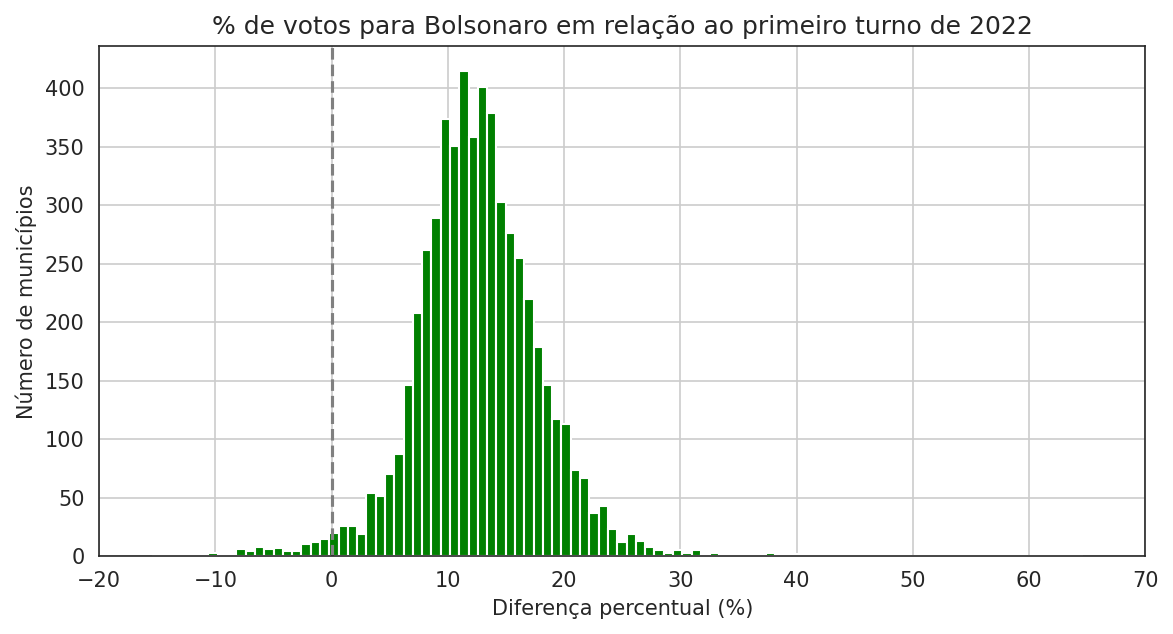

In [36]:
_df['porcentagem_diferenca_votos'].hist(bins=100,color='green')
plt.gca().set_xlim(-20,70)
plt.gca().axvline(0, linestyle='--',color='gray')
plt.gca().set_title('% de votos para Bolsonaro em relação ao primeiro turno de 2022')
plt.gca().set_ylabel('Número de municípios')
plt.gca().set_xlabel('Diferença percentual (%)')
_copy_bolsonaro = _df['porcentagem_diferenca_votos'].copy()

## Variação nos votos de Lula

In [37]:
_df = diferencas[diferencas['candidato'] == "LULA"]

### 10 cidades com mais votos proporcionais no segundo turno para Lula

In [38]:
_df.sort_values(by='porcentagem_diferenca_votos', ascending=False).head(20)[['id_ibge','municipio','candidato','diferenca_votos','porcentagem_diferenca_votos','votos_1t','votos_2t','prop_1t','prop_2t']]

,id_ibge,municipio,candidato,diferenca_votos,porcentagem_diferenca_votos,votos_1t,votos_2t,prop_1t,prop_2t
12688,2312908,Sobral/CE,LULA,16277,24.404396,66697,82974,55.456979,69.03
61180,4323606,Vista Alegre do Prata/RS,LULA,63,22.580645,279,342,21.136364,25.24
12868,2313955,Varjota/CE,LULA,1461,19.834374,7366,8827,59.547292,72.31
45748,3548807,São Caetano do Sul/SP,LULA,7125,18.665514,38172,45297,33.342942,39.93
45676,3548203,Santo Antônio do Pinhal/SP,LULA,310,18.044237,1718,2028,36.978046,42.77
39016,3305158,São José do Vale do Rio Preto/RJ,LULA,405,16.701031,2425,2830,19.395345,21.85
56152,4304101,Campos Borges/RS,LULA,166,16.64995,997,1163,40.185409,46.08
42772,3526308,Lagoinha/SP,LULA,244,15.926893,1532,1776,38.405615,44.7
46756,3556206,Valinhos/SP,LULA,3509,15.813429,22190,25699,31.028022,35.55
63052,5106174,Nova Nazaré/MT,LULA,114,15.468114,737,851,42.898719,46.12


### 10 cidades com menos votos proporcionais no segundo turno para Lula

In [39]:
_df.sort_values(by='porcentagem_diferenca_votos', ascending=True).head(20)[['id_ibge','municipio','candidato','diferenca_votos','porcentagem_diferenca_votos','votos_1t','votos_2t','prop_1t','prop_2t']]

,id_ibge,municipio,candidato,diferenca_votos,porcentagem_diferenca_votos,votos_1t,votos_2t,prop_1t,prop_2t
3688,1600550,Pracuúba/AP,LULA,-391,-23.554217,1660,1269,54.623231,54.28
1792,1400605,São Luiz/RR,LULA,-320,-22.566996,1418,1098,28.856329,27.78
3616,1600253,Itaubal/AP,LULA,-660,-21.810972,3026,2366,51.523923,53.61
784,1200393,Porto Walter/AC,LULA,-567,-21.315789,2660,2093,48.337271,52.87
808,1200427,Rodrigues Alves/AC,LULA,-384,-20.880914,1839,1455,20.742161,19.49
3592,1600212,Cutias/AP,LULA,-472,-20.379965,2316,1844,56.709109,59.64
3712,1600709,Tartarugalzinho/AP,LULA,-757,-16.744083,4521,3764,56.5337,57.73
736,1200336,Mâncio Lima/AC,LULA,-528,-16.31644,3236,2708,31.589223,29.96
1012,1300631,Beruri/AM,LULA,-1042,-16.222949,6423,5381,62.571846,63.02
856,1200609,Tarauacá/AC,LULA,-1240,-15.41905,8042,6802,43.45148,42.86


### Distribuição das diferenças % de mais votos, e menos votos para Lula

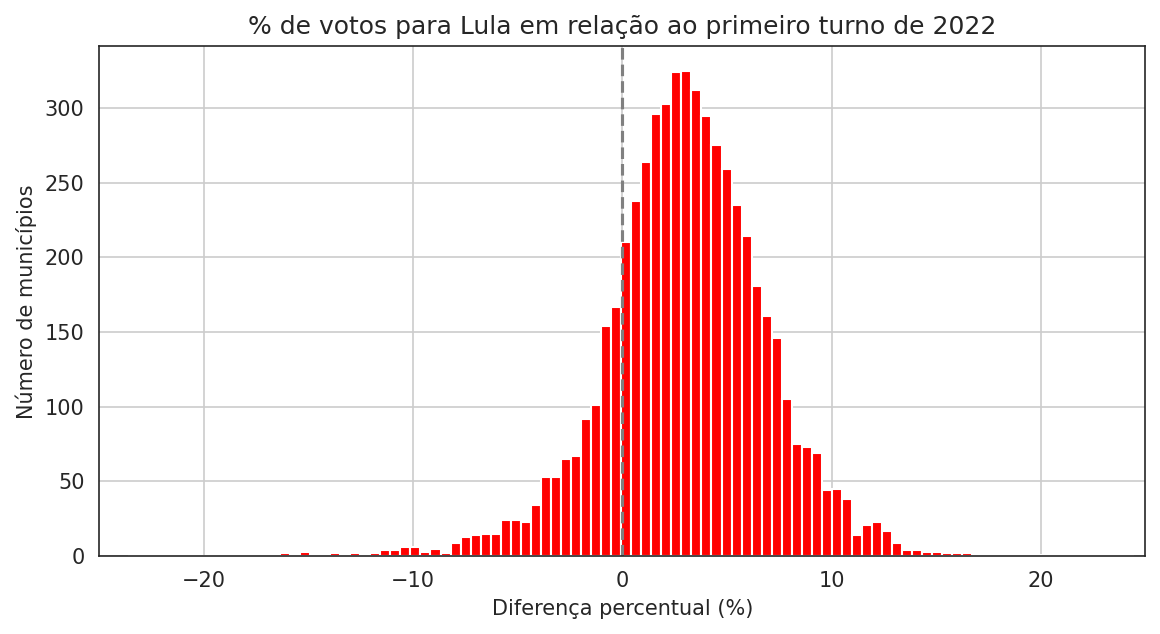

In [40]:
_df['porcentagem_diferenca_votos'].hist(bins=100,color='red')
plt.gca().set_xlim(-25,25)
plt.gca().axvline(0, linestyle='--',color='gray')
plt.gca().set_title('% de votos para Lula em relação ao primeiro turno de 2022')
plt.gca().set_ylabel('Número de municípios')
plt.gca().set_xlabel('Diferença percentual (%)')
_copy_lula = _df['porcentagem_diferenca_votos'].copy()

## Juntar todos os gráficos de municípios

In [41]:
dfs = []
_df = pd.DataFrame(_copy_total)
_df['type'] = 'Total'
dfs.append(_df)
_df = pd.DataFrame(_copy_bolsonaro)
_df['type'] = 'Bolsonaro'
dfs.append(_df)
_df = pd.DataFrame(_copy_lula)
_df['type'] = 'Lula'
dfs.append(_df)
_df = pd.concat(dfs)

Text(0.5, 0.98, '% de votos em relação ao primeiro turno de 2022')

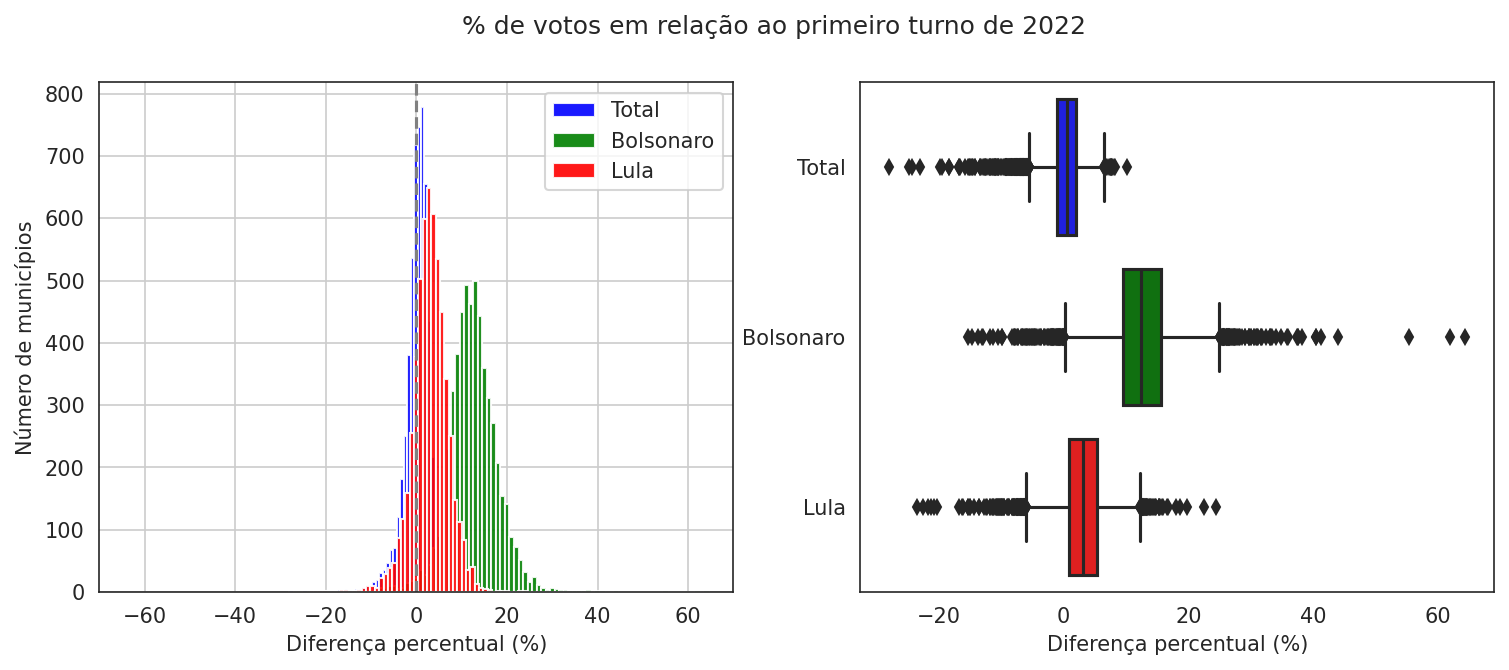

In [42]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4.5))

_copy_total.hist(bins=50,color='blue',label='Total',alpha=0.9,ax=axs[0])
_copy_bolsonaro.hist(bins=80,color='green',label='Bolsonaro',alpha=0.9,ax=axs[0])
_copy_lula.hist(bins=50,color='red',label='Lula',alpha=0.9,ax=axs[0])

axs[0].set_xlim(-70,70)
axs[0].axvline(0, linestyle='--',color='gray')
axs[0].set_ylabel('Número de municípios')
axs[0].set_xlabel('Diferença percentual (%)')
axs[0].legend()

sns.boxplot(x="porcentagem_diferenca_votos", y="type", data=_df,palette=['blue','green','red'], ax = axs[1])
axs[1].set_xlabel('Diferença percentual (%)')
axs[1].set_ylabel('')

fig.suptitle('% de votos em relação ao primeiro turno de 2022')